<a href="https://colab.research.google.com/github/alejovillores/TP4_oganizacion_de_datos/blob/main/secuencial_red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Librerias para autenticarnos con Google

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Librerias para trabajar

In [62]:
import pandas as pd
import numpy as np

import tensorflow as tf
print(tf.__version__)
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

2.7.0


1.1.5


Libreria para plotteo

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

In [15]:
shippings = pd.read_csv('/content/silkroad_shippings.csv')
shippings.head()


,item_id,description,est_delivery,price,timestamp
0,jj-luna-privacy-ebooks,ebook link,1 day,0.000000,2014-02-23T05:39:22
1,the-morality-of-capitalism,letter,4 days,0.001722,2014-02-23T05:39:29
2,survive,small book (domestic),4 days,0.017217,2014-02-23T05:39:33
3,a-non-religious-new-testament,media mail parcel (domestic),4 days,0.006870,2014-02-23T05:39:37
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1 day,0.000000,2014-02-23T05:39:41


In [9]:
bitcoin = pd.read_csv('/content/bitcoins.csv')
bitcoin.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 23, 2014",272.6,210.9,297.8,217.7,7.08K,29.29%
1,"Feb 24, 2014",153.6,272.6,252.1,129.0,12.05K,-43.65%
2,"Feb 25, 2014",198.8,153.6,226.6,163.9,7.70K,29.36%
3,"Feb 26, 2014",430.6,198.8,442.1,372.3,2.33K,116.67%
4,"Feb 27, 2014",432.3,430.6,438.3,424.2,1.05K,0.39%


Como el bitcoin es inestable, se debe mapear al precio en euros, que es el que tenemos en el `bitcoins.csv`

In [11]:
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
bitcoin.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2014-02-23,272.6,210.9,297.8,217.7,7.08K,29.29%
1,2014-02-24,153.6,272.6,252.1,129.0,12.05K,-43.65%
2,2014-02-25,198.8,153.6,226.6,163.9,7.70K,29.36%
3,2014-02-26,430.6,198.8,442.1,372.3,2.33K,116.67%
4,2014-02-27,432.3,430.6,438.3,424.2,1.05K,0.39%


In [16]:
shippings['timestamp'] = pd.to_datetime(shippings['timestamp'])
shippings.head()

,item_id,description,est_delivery,price,timestamp
0,jj-luna-privacy-ebooks,ebook link,1 day,0.000000,2014-02-23 05:39:22
1,the-morality-of-capitalism,letter,4 days,0.001722,2014-02-23 05:39:29
2,survive,small book (domestic),4 days,0.017217,2014-02-23 05:39:33
3,a-non-religious-new-testament,media mail parcel (domestic),4 days,0.006870,2014-02-23 05:39:37
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1 day,0.000000,2014-02-23 05:39:41


Paso desde est_delivery a los numeros de delivery

In [26]:
def make_numeric(x):
    num = ""
    for letter in x:
        if letter.isnumeric():
            num +=letter
    return num

In [29]:
def a(x):
    if x == '':
        return 0
    else:
        return x

In [28]:
shippings['est_delivery'].map(make_numeric)
shippings.head()

,description,est_delivery,price,date
0,ebook link,1,0.000000,2014-02-23
1,letter,4,0.001722,2014-02-23
2,small book (domestic),4,0.017217,2014-02-23
3,media mail parcel (domestic),4,0.006870,2014-02-23
4,ebook link,1,0.000000,2014-02-23


In [32]:
shippings['est_delivery'] = shippings['est_delivery'].map(a)
shippings.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,description,est_delivery,price,date
0,ebook link,1,0.000000,2014-02-23
1,letter,4,0.001722,2014-02-23
2,small book (domestic),4,0.017217,2014-02-23
3,media mail parcel (domestic),4,0.006870,2014-02-23
4,ebook link,1,0.000000,2014-02-23


In [35]:
shippings['est_delivery'] = shippings['est_delivery'].astype(int)
shippings.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,description,est_delivery,price,date
0,ebook link,1,0.000000,2014-02-23
1,letter,4,0.001722,2014-02-23
2,small book (domestic),4,0.017217,2014-02-23
3,media mail parcel (domestic),4,0.006870,2014-02-23
4,ebook link,1,0.000000,2014-02-23


In [18]:
shippings['date'] = shippings['timestamp'].dt.date
shippings = shippings[['description','est_delivery','price','date']]
shippings.head()

,description,est_delivery,price,date
0,ebook link,1 day,0.000000,2014-02-23
1,letter,4 days,0.001722,2014-02-23
2,small book (domestic),4 days,0.017217,2014-02-23
3,media mail parcel (domestic),4 days,0.006870,2014-02-23
4,ebook link,1 day,0.000000,2014-02-23


In [23]:
bitcoin.rename(columns={'Date':'date'},inplace=True)
bitcoin.head()

,date,Price,Open,High,Low,Vol.,Change %
0,2014-02-23,272.6,210.9,297.8,217.7,7.08K,29.29%
1,2014-02-24,153.6,272.6,252.1,129.0,12.05K,-43.65%
2,2014-02-25,198.8,153.6,226.6,163.9,7.70K,29.36%
3,2014-02-26,430.6,198.8,442.1,372.3,2.33K,116.67%
4,2014-02-27,432.3,430.6,438.3,424.2,1.05K,0.39%


In [24]:
bitcoin['date'] = bitcoin['date'].astype('datetime64[ns]')
shippings['date'] = shippings['date'].astype('datetime64[ns]')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
merged = shippings.merge(bitcoin,on='date',how='left')
complete_shipping = merged[['description','est_delivery','price','Price','date']]
complete_shipping.head()

,description,est_delivery,price,Price,date
0,ebook link,1,0.000000,272.6,2014-02-23
1,letter,4,0.001722,272.6,2014-02-23
2,small book (domestic),4,0.017217,272.6,2014-02-23
3,media mail parcel (domestic),4,0.006870,272.6,2014-02-23
4,ebook link,1,0.000000,272.6,2014-02-23


In [40]:
complete_shipping['total'] = complete_shipping['price'] * complete_shipping['Price']
complete_shipping

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,description,est_delivery,price,Price,date,total
0,ebook link,1,0.000000,272.6,2014-02-23,0.000000
1,letter,4,0.001722,272.6,2014-02-23,0.469417
2,small book (domestic),4,0.017217,272.6,2014-02-23,4.693354
3,media mail parcel (domestic),4,0.006870,272.6,2014-02-23,1.872762
4,ebook link,1,0.000000,272.6,2014-02-23,0.000000
...,...,...,...,...,...,...
560453,Priority Mail,3,0.018512,220.4,2015-01-24,4.080045
560454,Priority Mail,3,0.018363,220.4,2015-01-24,4.047205
560455,Priority Mail Express,1,0.064269,220.4,2015-01-24,14.164888
560456,Priority Mail,3,0.018363,220.4,2015-01-24,4.047205


In [41]:
del merged

In [42]:
complete_shipping['description'].fillna('unknown',inplace=True)

In [80]:
complete_shipping = complete_shipping[(complete_shipping['total'] >= 0) & (complete_shipping['total'] <= 5000)]
complete_shipping

,description,est_delivery,date,total
0,ebook link,1,2014-02-23,0.000000
1,letter,4,2014-02-23,0.469417
2,small book (domestic),4,2014-02-23,4.693354
3,media mail parcel (domestic),4,2014-02-23,1.872762
4,ebook link,1,2014-02-23,0.000000
...,...,...,...,...
560453,Priority Mail,3,2015-01-24,4.080045
560454,Priority Mail,3,2015-01-24,4.047205
560455,Priority Mail Express,1,2015-01-24,14.164888
560456,Priority Mail,3,2015-01-24,4.047205


In [81]:
labels = complete_shipping['total']
X = complete_shipping.drop(['total'],axis=1)
print(labels)
print(X)

0          0.000000
1          0.469417
2          4.693354
3          1.872762
4          0.000000
            ...    
560453     4.080045
560454     4.047205
560455    14.164888
560456     4.047205
560457     7.784748
Name: total, Length: 560260, dtype: float64
                         description  est_delivery       date
0                         ebook link             1 2014-02-23
1                             letter             4 2014-02-23
2              small book (domestic)             4 2014-02-23
3       media mail parcel (domestic)             4 2014-02-23
4                         ebook link             1 2014-02-23
...                              ...           ...        ...
560453                 Priority Mail             3 2015-01-24
560454                 Priority Mail             3 2015-01-24
560455         Priority Mail Express             1 2015-01-24
560456                 Priority Mail             3 2015-01-24
560457          EMS Express Shipping             7 201

In [82]:
# Para lograr un mejor encoding, separare las fechas en columnas distintas
X['year'] = X['date'].dt.year
X['month']= X['date'].dt.month
X['day']= X['date'].dt.day
del X['date']
X

,description,est_delivery,year,month,day
0,ebook link,1,2014,2,23
1,letter,4,2014,2,23
2,small book (domestic),4,2014,2,23
3,media mail parcel (domestic),4,2014,2,23
4,ebook link,1,2014,2,23
...,...,...,...,...,...
560453,Priority Mail,3,2015,1,24
560454,Priority Mail,3,2015,1,24
560455,Priority Mail Express,1,2015,1,24
560456,Priority Mail,3,2015,1,24


In [48]:
del complete_shipping['price']
del complete_shipping['Price']

## Feature Engeniering
Dado que tenemos varias descripciones lo que se hára es un feature engineering aplicandole el OrdinalEncoder de sklearn

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [83]:
X_train, X_validation, labels_train, labels_validation = train_test_split(X, labels, test_size=0.2, random_state=42)

In [84]:
# Hago un label enconding para description
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
X_train['description'] = ordinal_encoder.fit_transform(X_train['description'].astype(str).values.reshape(-1,1))
X_train

,description,est_delivery,year,month,day
428450,2970.0,2,2014,10,10
378537,794.0,5,2014,9,26
6593,995.0,1,2014,6,10
429028,2377.0,5,2014,10,10
134691,2970.0,4,2014,6,10
...,...,...,...,...,...
110334,900.0,1,2014,6,10
259337,1364.0,2,2014,8,15
366014,1369.0,11,2014,9,19
131998,2812.0,2,2014,6,10


In [85]:
# Hago los encodings del validation
X_validation['description'] = ordinal_encoder.transform(X_validation['description'].astype(str).values.reshape(-1,1))
X_validation

,description,est_delivery,year,month,day
237213,878.0,4,2014,8,6
466449,2812.0,4,2014,10,19
412003,3051.0,5,2014,10,6
11583,3170.0,3,2014,6,10
145560,1889.0,5,2014,6,10
...,...,...,...,...,...
365907,3027.0,7,2014,9,19
35617,1361.0,3,2014,6,10
181028,3433.0,14,2014,6,18
112997,1963.0,8,2014,6,10


## Armado de la red

In [63]:
Dense?

In [144]:
from keras.engine import input_layer
model = Sequential()

# Agregamos una capa, esta debe tener una entrada de la cantidad de columnas que tenemos

model.add(Dense(5,activation='relu',input_shape=(5,),name='capa_1'))
model.add(Dense(3,activation='relu',name='capa_2'))

# Al agregar Dropouts a nuetra red, bajamos la probabilidad de que nos de overfitting
model.add((Dense(1,activation='relu',name='capa_3')))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 5)                 30        
                                                                 
 capa_2 (Dense)              (None, 3)                 18        
                                                                 
 capa_3 (Dense)              (None, 1)                 4         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


Compilado

In [145]:
# Como estamos ante una regression, para el optimizer se usará RMSprop()
# Para el loss, usare mse
model.compile(optimizer='rmsprop',loss='mse')

In [88]:
X_train.isnull().sum()

description     0
est_delivery    0
year            0
month           0
day             0
dtype: int64

In [89]:
X_validation.isnull().sum()

description     0
est_delivery    0
year            0
month           0
day             0
dtype: int64

In [74]:
del X_train['price']
del X_train['Price']

del X_validation['price']
del X_validation['Price']

Entrenamiento

In [127]:
from tensorflow.keras.callbacks import EarlyStopping
custom_early_stopping = EarlyStopping(monitor='val_loss',
                                      restore_best_weights=True,
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')

In [148]:
history = model.fit(X_train,labels_train,batch_size=2048, epochs=100, verbose=1, validation_data=(X_validation, labels_validation),callbacks=[custom_early_stopping])

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 2716.7954 - val_loss: 2702.4929
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 2716.8655 - val_loss: 2698.1313
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 2717.1892 - val_loss: 2697.7441
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 2715.9556 - val_loss: 2700.5212
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 2715.6025 - val_loss: 2696.9873
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 2714.6853 - val_loss: 2709.6733
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 2715.0598 - val_loss: 2699.4551
Epoch 8/100
219/219 [==============================] - 1s 4ms/step - loss: 2715.1143 - val_loss: 2695.0161
Epoch 9/100
219/219 [==============================] - 1s 4ms/step - loss: 2712.8931 - val_loss: 2707.3804
Epoch 10/100
219/219 [===============

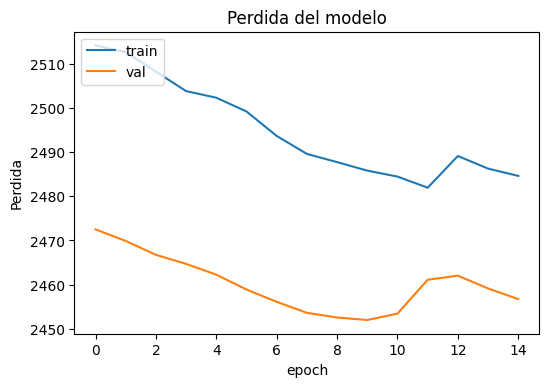

{'loss': [2723.250244140625,
  2723.2490234375,
  2723.25,
  2723.250244140625,
  2723.24853515625,
  2723.25],
 'val_loss': [2711.161865234375,
  2711.161865234375,
  2711.161865234375,
  2711.161865234375,
  2711.161865234375,
  2711.161865234375]}

In [150]:
predictions = model.predict(X_validation,verbose=1)

3502/3502 [==============================] - 8s 2ms/step
